In [23]:
using Gadfly
include("SB.jl")
using SB

In [10]:
#create a simple market to test cvar ness
budget = .1
eps_ = .1
out_mkt = SB.simMkt(10, 10000);

zt, x_out = SB.saa_port(eps_, budget, SB.simMkt(10, 10000))
z_out = mean(out_mkt * x_out)
cvar_out = SB.cvar_sort(out_mkt*x_out, eps_)
println(z_out, "\t", cvar_out)
println(x_out')

0.07093053796936168	0.0995599044923611
[0.0 0.0 0.0 0.08438538418893007 0.10692807657080401 0.14767103524708086 0.15939857939234614 0.1646584990218635 0.17476320817531463 0.1621952174036607]


In [16]:
##simulate the performance of SAA
numRuns = 100
z_saa = zeros(Float64, numRuns)
cvar_saa = zeros(Float64, numRuns)

z_bag = zeros(Float64, numRuns)
cvar_bag = zeros(Float64, numRuns)
for iRun = 1:numRuns
    dat = SB.simMkt(10, 50)
    z, x = SB.saa_port(eps_, budget, dat)
    z_saa[iRun] = mean(out_mkt * x) / z_out
    cvar_saa[iRun] = SB.cvar_sort(out_mkt*x, eps_) / budget
    
    zt, xb = SB.baggedSAA(d-> SB.saa_port(eps_, budget, d), dat, 500)
    xb = vec(mean(xb, 1))
    z_bag[iRun] = mean(out_mkt * x) / z_out
    cvar_bag[iRun] = SB.cvar_sort(out_mkt*xb, eps_) /.1
end

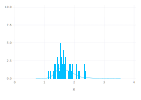

In [15]:
plot(x=cvar_saa, Geom.histogram, Geom.density)

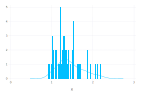

In [17]:
plot(x=cvar_bag, Geom.histogram, Geom.density)

In [18]:
println( mean(z_saa), "\t", mean(z_bag) )
println( mean(cvar_saa), "\t", mean(cvar_bag) )

0.9990590414558181	0.9990590414558181
1.6727110888622219	1.4574347694149297


In [24]:
SB.test1("temp", [50 100], [25 50], 10)

LoadError: LoadError: DimensionMismatch("mismatch in dimension 1 (expected 1 got 25)")
while loading In[24], in expression starting on line 1